<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Modeling Predictiion Dengue Cases in 


### Import libary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.model_selection import train_test_split

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import itertools
#import warnings
import matplotlib.pyplot as plt

Load Data

In [2]:
df = pd.read_csv('../data/weekly_data.csv')

In [3]:
df.head(10)

,Unnamed: 0,total_rainfall,mean_temperature,minimum_temperature,maximum_temperature,dengue_cases,interest,inbound,outbound
0,2012-W01,106.8,26.762500,22.2,31.4,74,8,239701,115076
1,2012-W02,25.8,26.228571,22.1,32.3,66,8,239701,115076
2,2012-W03,28.0,26.914286,22.9,32.5,61,6,239701,115076
3,2012-W04,8.6,26.600000,23.5,31.6,52,10,239701,115076
4,2012-W05,55.7,26.485714,21.5,31.6,85,7,239701,115076
5,2012-W06,1.6,27.500000,24.4,32.3,87,5,283638,132094
6,2012-W07,38.2,26.671429,22.7,31.9,65,6,283638,132094
7,2012-W08,3.2,27.700000,24.8,32.6,51,9,283638,132094
8,2012-W09,26.4,27.142857,23.8,33.2,55,6,283638,132094
9,2012-W10,52.6,26.928571,21.1,31.5,46,5,310783,171836


In [4]:
df.tail()

,Unnamed: 0,total_rainfall,mean_temperature,minimum_temperature,maximum_temperature,dengue_cases,interest,inbound,outbound
567,2022-W48,96.8,27.057143,22.8,32.9,242,19,204085,185454
568,2022-W49,65.6,26.800000,23.9,32.7,327,27,232834,250220
569,2022-W50,81.8,26.414286,23.9,32.2,290,30,232834,250220
570,2022-W51,10.2,26.685714,23.4,31.7,270,20,232834,250220
571,2022-W52,16.0,27.100000,23.1,31.3,285,25,232834,250220


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           572 non-null    object 
 1   total_rainfall       572 non-null    float64
 2   mean_temperature     572 non-null    float64
 3   minimum_temperature  572 non-null    float64
 4   maximum_temperature  572 non-null    float64
 5   dengue_cases         572 non-null    int64  
 6   interest             572 non-null    int64  
 7   inbound              572 non-null    int64  
 8   outbound             572 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 40.3+ KB


In [6]:
df.set_index(df['Unnamed: 0'],inplace=True)

In [7]:
df.drop(columns='Unnamed: 0')

,total_rainfall,mean_temperature,minimum_temperature,maximum_temperature,dengue_cases,interest,inbound,outbound
Unnamed: 0,,,,,,,,
2012-W01,106.8,26.762500,22.2,31.4,74,8,239701,115076
2012-W02,25.8,26.228571,22.1,32.3,66,8,239701,115076
2012-W03,28.0,26.914286,22.9,32.5,61,6,239701,115076
2012-W04,8.6,26.600000,23.5,31.6,52,10,239701,115076
2012-W05,55.7,26.485714,21.5,31.6,85,7,239701,115076
...,...,...,...,...,...,...,...,...
2022-W48,96.8,27.057143,22.8,32.9,242,19,204085,185454
2022-W49,65.6,26.800000,23.9,32.7,327,27,232834,250220
2022-W50,81.8,26.414286,23.9,32.2,290,30,232834,250220


In [8]:
df.head(10)

,Unnamed: 0,total_rainfall,mean_temperature,minimum_temperature,maximum_temperature,dengue_cases,interest,inbound,outbound
Unnamed: 0,,,,,,,,,
2012-W01,2012-W01,106.8,26.762500,22.2,31.4,74,8,239701,115076
2012-W02,2012-W02,25.8,26.228571,22.1,32.3,66,8,239701,115076
2012-W03,2012-W03,28.0,26.914286,22.9,32.5,61,6,239701,115076
2012-W04,2012-W04,8.6,26.600000,23.5,31.6,52,10,239701,115076
2012-W05,2012-W05,55.7,26.485714,21.5,31.6,85,7,239701,115076
2012-W06,2012-W06,1.6,27.500000,24.4,32.3,87,5,283638,132094
2012-W07,2012-W07,38.2,26.671429,22.7,31.9,65,6,283638,132094
2012-W08,2012-W08,3.2,27.700000,24.8,32.6,51,9,283638,132094
2012-W09,2012-W09,26.4,27.142857,23.8,33.2,55,6,283638,132094


conduct data shift as we are unbale to use current month data to predict current month dengue cases, therefor we will be using data from pervious month to train the model

In [9]:
df['mean_temperature'] = df['mean_temperature'].shift(4)
df['total_rainfall'] = df['total_rainfall'].shift(4)
df['interest'] = df['interest'].shift(4)
df['minimum_temperature'] = df['minimum_temperature'].shift(4)
df['maximum_temperature'] = df['maximum_temperature'].shift(4)
df['inbound'] = df['inbound'].shift(4)
df['outbound'] = df['outbound'].shift(4)

# Drop any rows with missing values
df.dropna(inplace=True)

In [64]:
df.head(10)

,Unnamed: 0,total_rainfall,mean_temperature,minimum_temperature,maximum_temperature,dengue_cases,interest,inbound,outbound,first_diff_dengue,second_diff_dengue
Unnamed: 0,,,,,,,,,,,
2012-W05,2012-W05,106.8,26.762500,22.2,31.4,85,8.0,239701.0,115076.0,NaN,NaN
2012-W06,2012-W06,25.8,26.228571,22.1,32.3,87,8.0,239701.0,115076.0,2.0,NaN
2012-W07,2012-W07,28.0,26.914286,22.9,32.5,65,6.0,239701.0,115076.0,-22.0,-24.0
2012-W08,2012-W08,8.6,26.600000,23.5,31.6,51,10.0,239701.0,115076.0,-14.0,8.0
2012-W09,2012-W09,55.7,26.485714,21.5,31.6,55,7.0,239701.0,115076.0,4.0,18.0
2012-W10,2012-W10,1.6,27.500000,24.4,32.3,46,5.0,283638.0,132094.0,-9.0,-13.0
2012-W11,2012-W11,38.2,26.671429,22.7,31.9,64,6.0,283638.0,132094.0,18.0,27.0
2012-W12,2012-W12,3.2,27.700000,24.8,32.6,73,9.0,283638.0,132094.0,9.0,-9.0
2012-W13,2012-W13,26.4,27.142857,23.8,33.2,48,6.0,283638.0,132094.0,-25.0,-34.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 2012-W05 to 2022-W52
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           568 non-null    object 
 1   total_rainfall       568 non-null    float64
 2   mean_temperature     568 non-null    float64
 3   minimum_temperature  568 non-null    float64
 4   maximum_temperature  568 non-null    float64
 5   dengue_cases         568 non-null    int64  
 6   interest             568 non-null    float64
 7   inbound              568 non-null    float64
 8   outbound             568 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 44.4+ KB


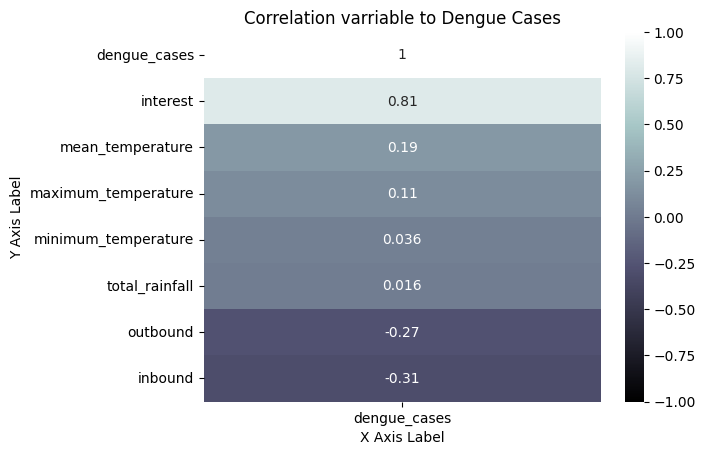

In [12]:
# Define custom y-axis tick labels
yticklabels = df['dengue_cases']

# Create a heatmap using seaborn with custom y-axis tick labels
#sns.heatmap(df.drop(columns='Unnamed: 0', inplace=False), annot=True, cmap='coolwarm', yticklabels=yticklabels)
sns.heatmap(df.corr(method='pearson',numeric_only=True)[['dengue_cases']].sort_values(by='dengue_cases', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='bone')

# Add labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Correlation varriable to Dengue Cases')

# Display the heatmap
plt.show()

From this heatmap we are able to tell that variables: interest, mean temperature, inbound and outbound has some correlation to Dengue Cases 

In [13]:
#function to plot 
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

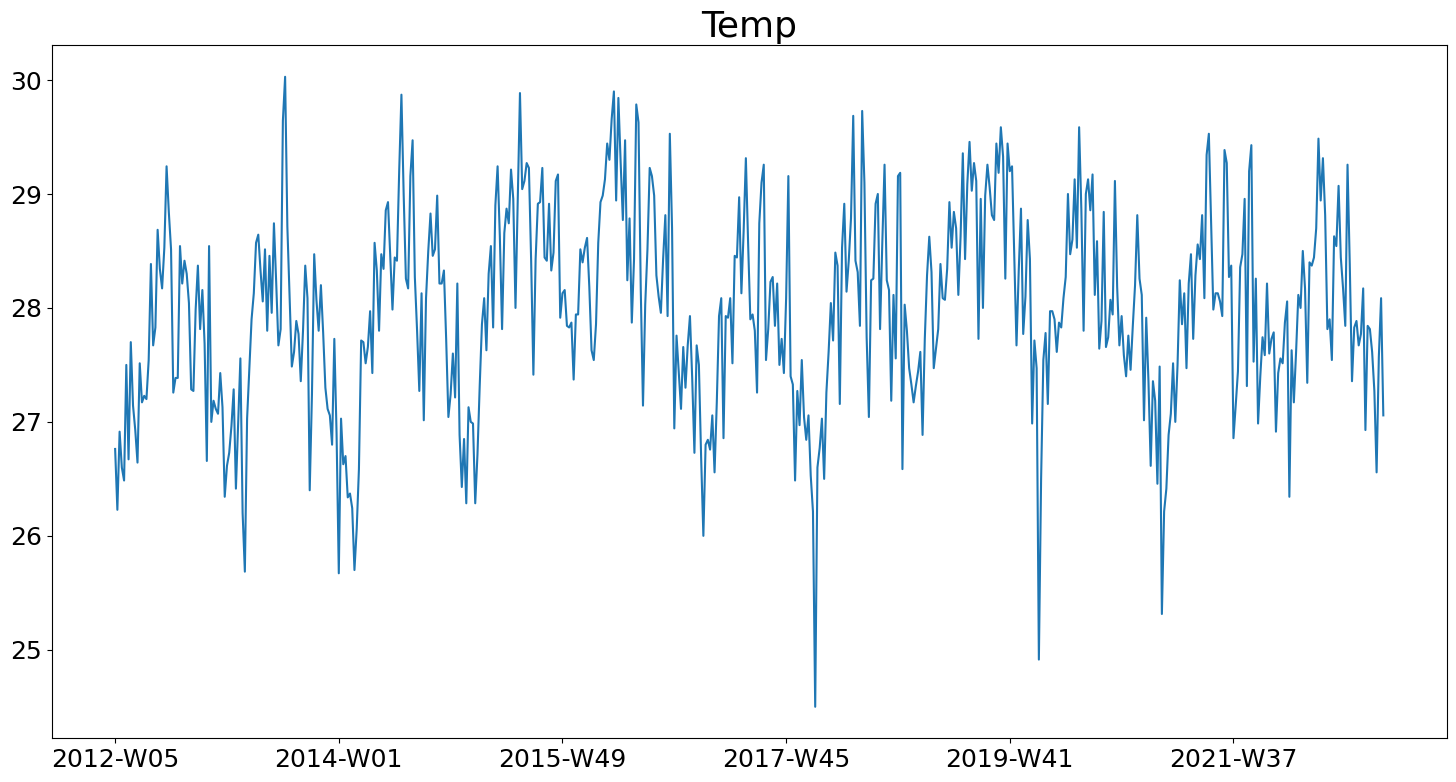

In [14]:
plot_series(df,['mean_temperature'], title='Temp', steps =100)

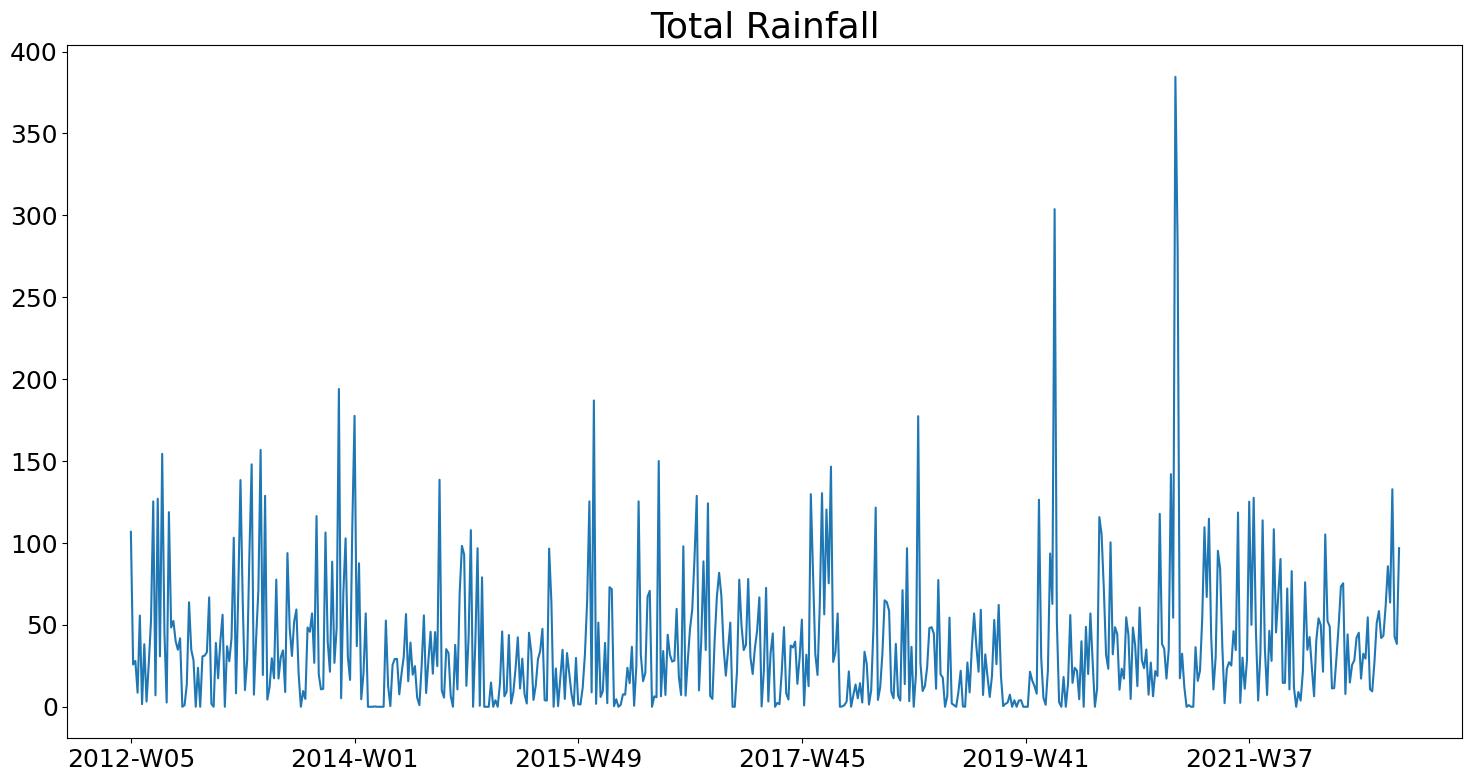

In [15]:
plot_series(df,['total_rainfall'], title='Total Rainfall', steps =100)

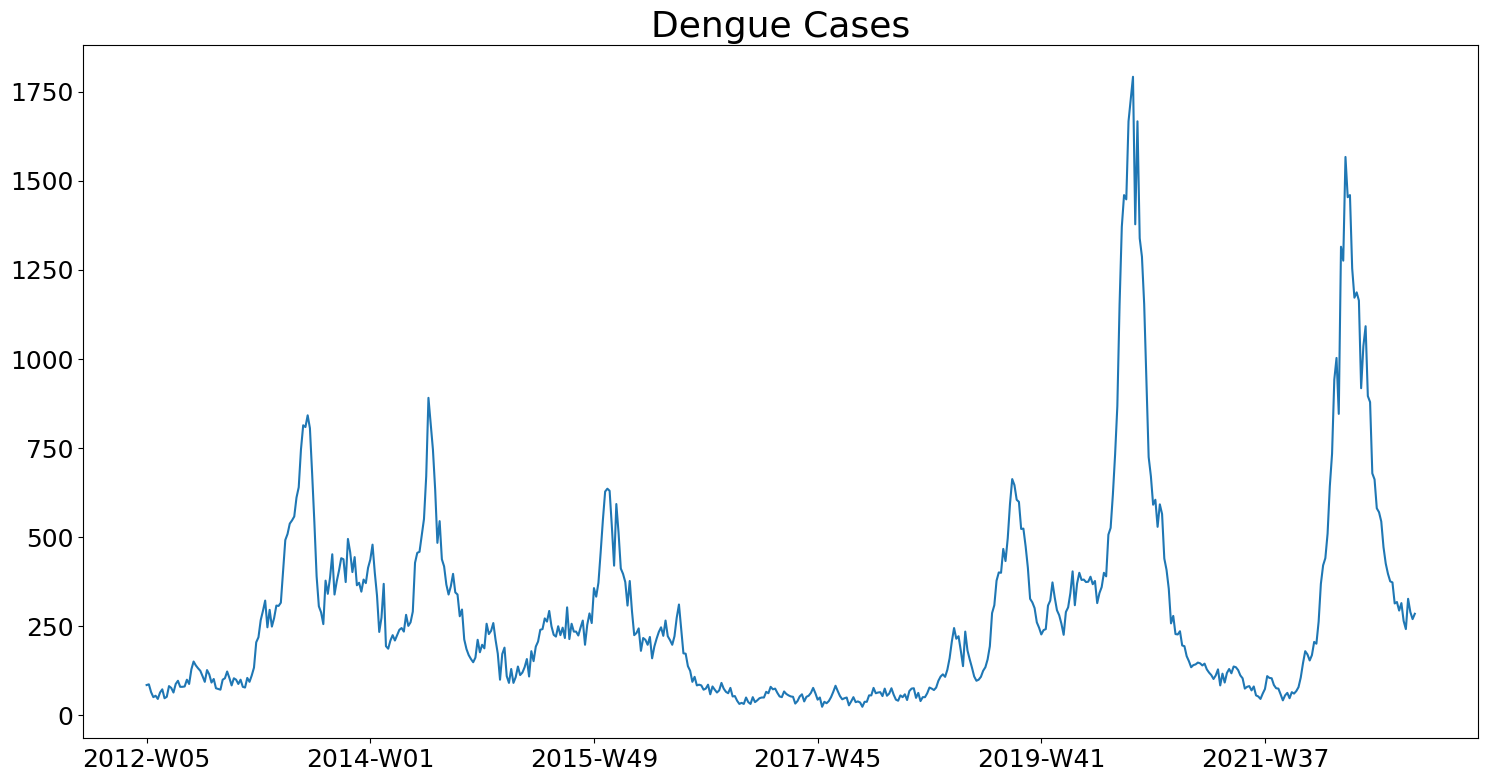

In [16]:
plot_series(df,['dengue_cases'], title='Dengue Cases', steps =100)

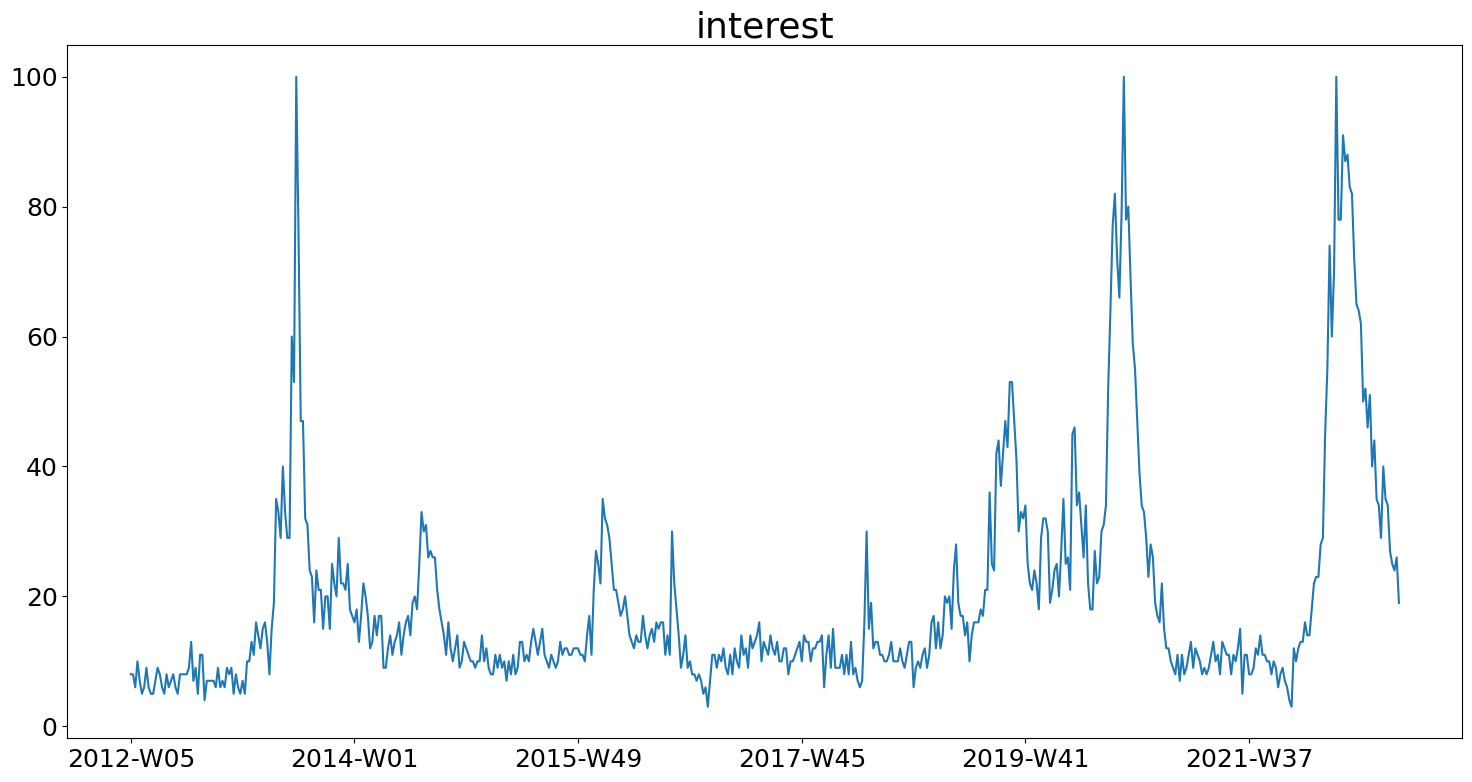

In [17]:
plot_series(df,['interest'], title='interest', steps =100)

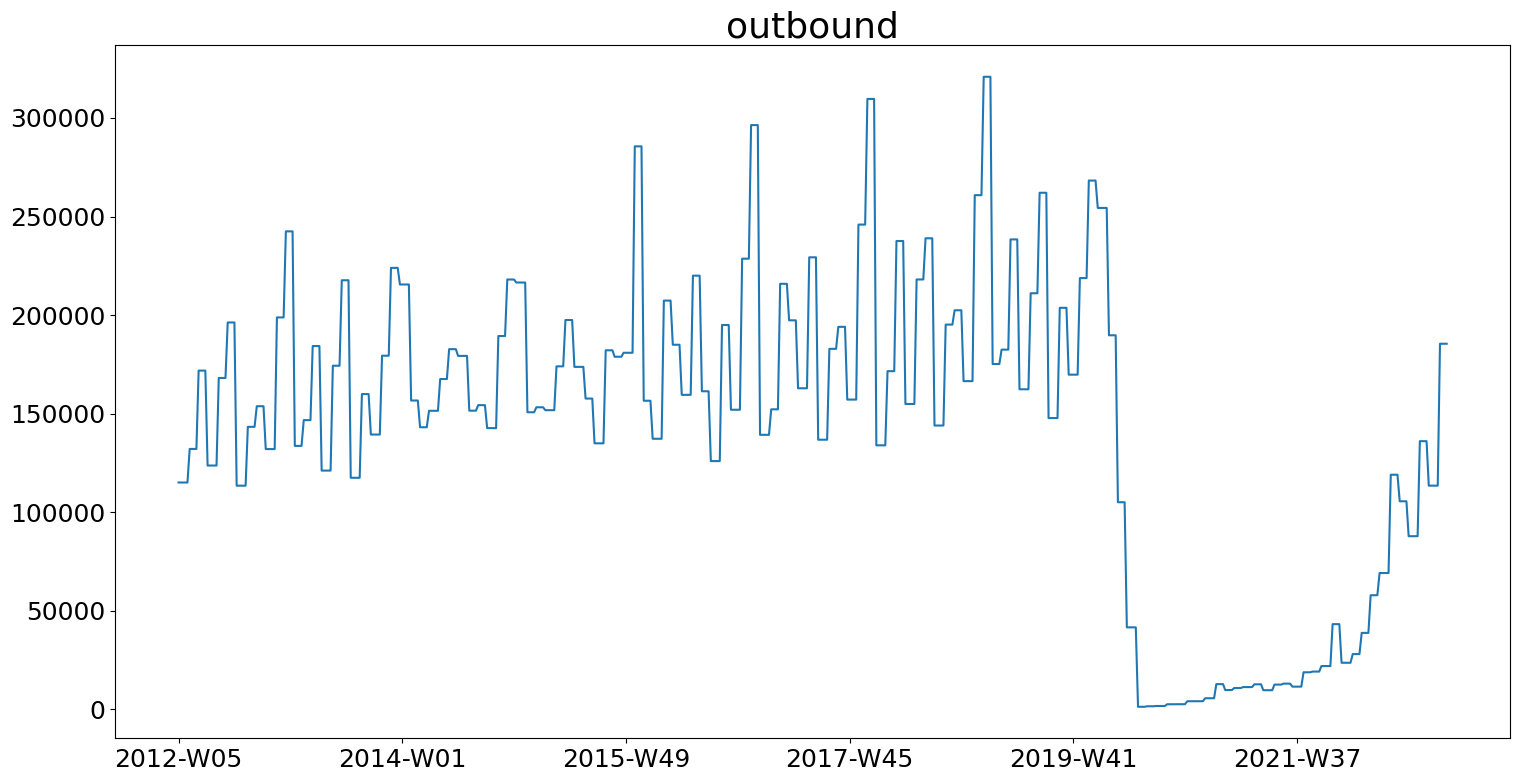

In [18]:
plot_series(df,['outbound'], title='outbound', steps =100)

create first and second different to check stationary

In [19]:
df['first_diff_dengue'] = df['dengue_cases'].diff()
df['second_diff_dengue'] = df['dengue_cases'].diff().diff()

In [20]:
adfuller(df['mean_temperature'])

(-5.283175138541416,
 5.932604152594643e-06,
 4,
 563,
 {'1%': -3.4420185006698127,
  '5%': -2.8666873299250253,
  '10%': -2.5695113665058726},
 1051.1233459993964)

In [21]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [22]:
interpret_dftest(adfuller(df['dengue_cases']))

Test Statistic   -3.722923
p-value           0.003802
dtype: float64

In [23]:
interpret_dftest(adfuller(df['first_diff_dengue'].dropna()))

Test Statistic   -7.718027e+00
p-value           1.213484e-11
dtype: float64

In [24]:
interpret_dftest(adfuller(df['second_diff_dengue'].dropna()))

Test Statistic   -9.071443e+00
p-value           4.291350e-15
dtype: float64

From this interpret, we can conduct one diffencing is enough

In [25]:
Weekly_dengue = pd.DataFrame(df['dengue_cases'])
Weekly_dengue

,dengue_cases
Unnamed: 0,
2012-W05,85
2012-W06,87
2012-W07,65
2012-W08,51
2012-W09,55
...,...
2022-W48,242
2022-W49,327
2022-W50,290


### Finding must way to split the data

In [26]:
print(f'Number of observations: {round(len(Weekly_dengue))} ')
print(f'Number of training observations: {round(len(Weekly_dengue) * 0.75)}')
print(f'Number of testing observations: {len(Weekly_dengue) - round(len(Weekly_dengue) * 0.75)}')

Number of observations: 568 
Number of training observations: 426
Number of testing observations: 142


In [27]:
print(f'Number of observations: {round(len(df))} ')
print(f'Number of training observations: {round(len(df) * 0.85)}')
print(f'Number of testing observations: {len(df) - round(len(df) * 0.85)}')

#train = Weekly_dengue.iloc[:430,]
#test = Weekly_dengue.iloc[430:,]

Number of observations: 568 
Number of training observations: 483
Number of testing observations: 85


In [28]:
print(f'Number of observations: {round(len(df))} ')
print(f'Number of training observations: {round(len(df) * 0.9)}')
print(f'Number of testing observations: {len(df) - round(len(df) * 0.9)}')

train = Weekly_dengue.iloc[:509,]
test = Weekly_dengue.iloc[508:,]

Number of observations: 568 
Number of training observations: 511
Number of testing observations: 57


we will use 10 year of data to predict 1 year data

### Create function for vision on train and pred vs actual data

In [212]:
def train_test_plot(actual, pred):
    """
    Function to return plot with 3 line of :train data set, actual data, predited data
    
    Parameters
    ----------
    
    train: pandas Dataframe
        training dataset
    
    actual: pandas Dataframe
        whole orignal dataset
        
    pred: pandas Dataframe
        pred dataset
        
    Returns
    -------
    plot
    
    """
    plt.figure(figsize=(16, 8))
    plt.plot(pred, c='orange',label='Pred Datset');
    plt.plot(actual, color = 'blue',label='Orginal Data Set')
    
    plt.legend()

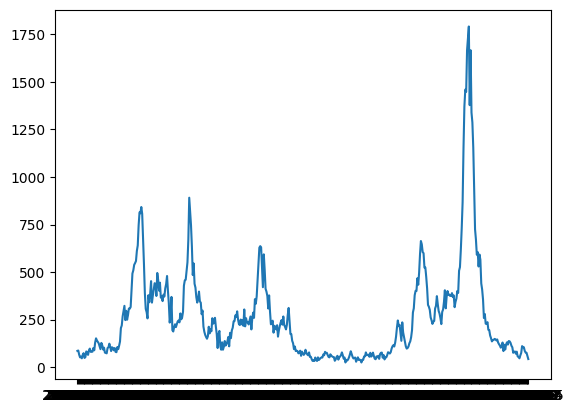

In [30]:
plt.plot(train['dengue_cases'])

Mean Squared Error: 16605.902505340946
[array([21.84409962,  0.53218168, 15.19656081])]


Text(0, 0.5, 'Dengue_cases')

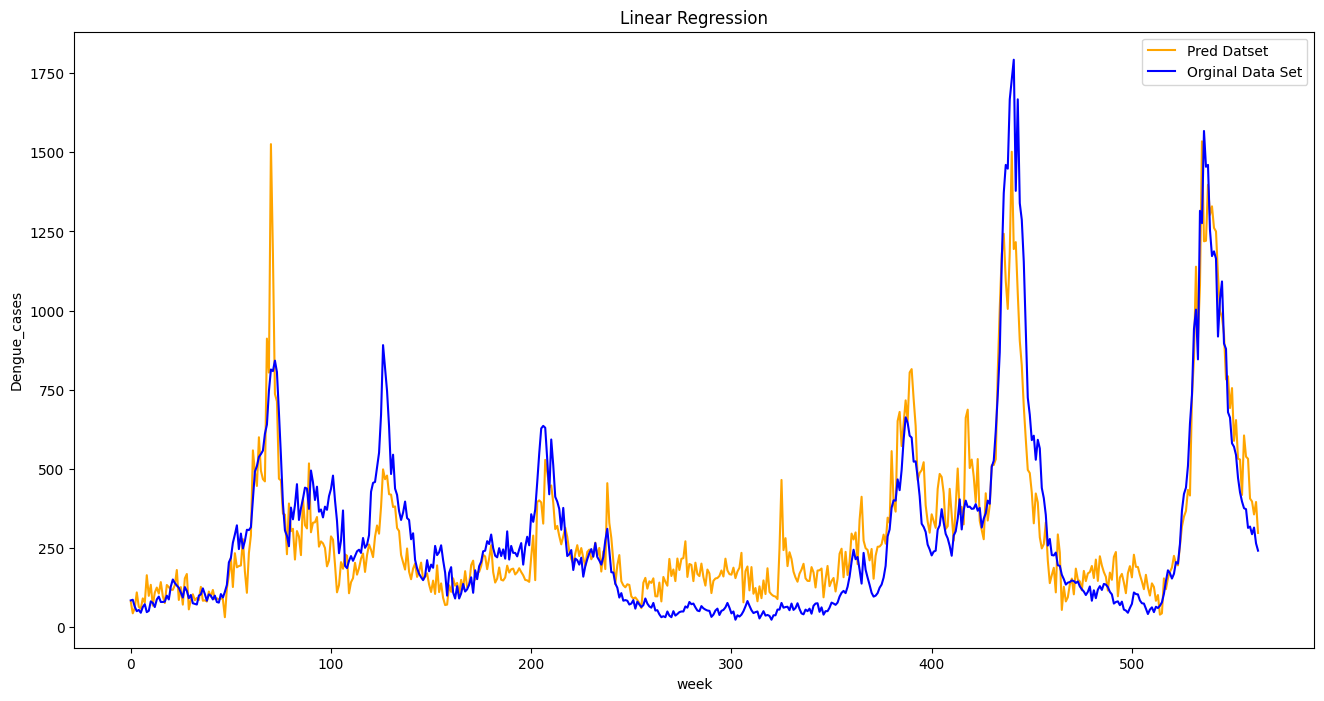

In [213]:
train = df.iloc[:511,]
test = df.iloc[511:,]

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_test= test[['mean_temperature','total_rainfall', 'interest']].values
#y_test= test['dengue_cases'].values.reshape(-1, 1)

# Step 3: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_lr = model.predict(X[4:568])


# Step 5: Evaluate the model
mse = mean_squared_error(y[0:564], y_pred_lr)
print(f'Mean Squared Error: {mse}')

coef=list(model.coef_)
print(coef)

actual_y_train= train['dengue_cases']
train_test_plot(y[0:564] ,y_pred_lr)
plt.title('Linear Regression')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

(568, 1)

Mean Squared Error: 16567.90134305895
[20.17027328596343, 0.5173491405730075, 15.209822465523931]


Text(0, 0.5, 'Dengue_cases')

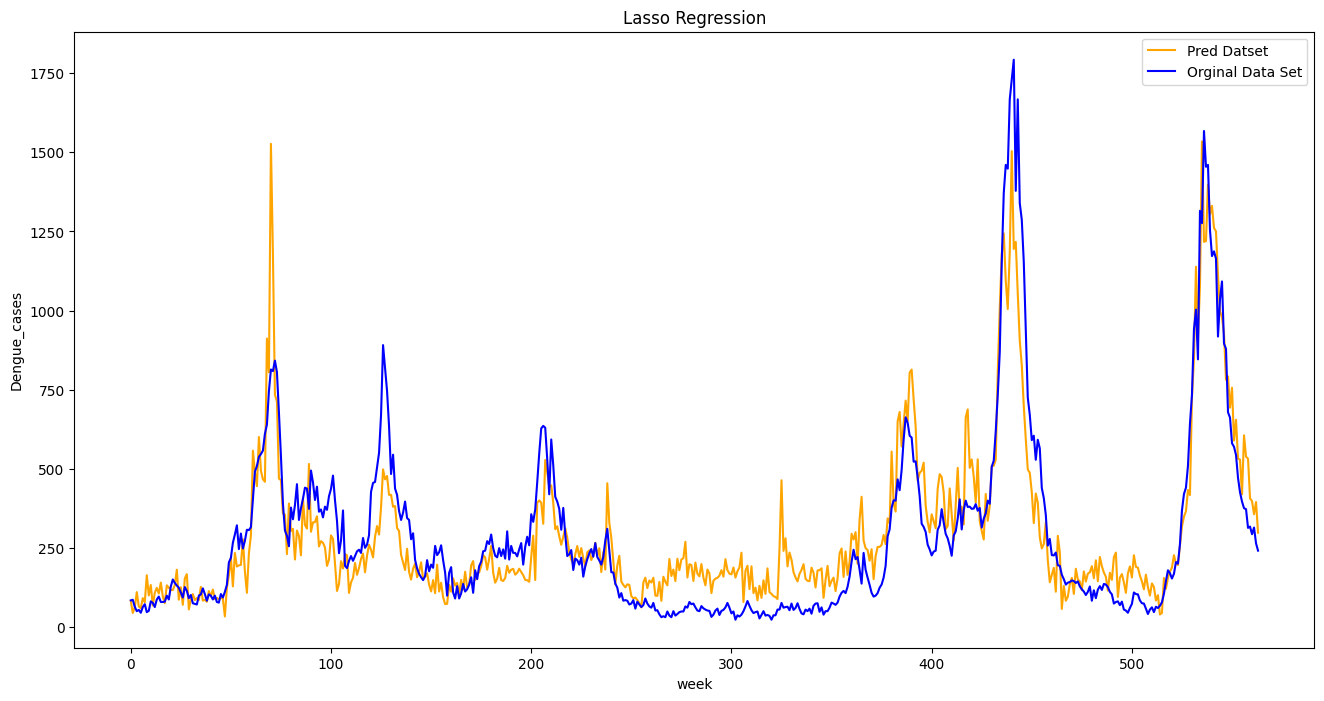

In [197]:
train = df.iloc[:511,]
test = df.iloc[511:,]

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_test= test[['mean_temperature','total_rainfall', 'interest']].values
#y_test= test['dengue_cases'].values.reshape(-1, 1)

# Step 3: Create and train the linear regression model
model = Lasso()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_lasso = model.predict(X[4:568])


# Step 5: Evaluate the model
mse = mean_squared_error(y[0:564], y_pred_lasso)
print(f'Mean Squared Error: {mse}')

actual_y_train= train['dengue_cases']
train_test_plot(y[0:564] ,y_pred_lasso)

coef=list(model.coef_)
print(coef)

plt.title('Lasso Regression')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

Mean Squared Error: 16604.02336781096
[array([21.76425241,  0.53150039, 15.19725704])]


Text(0, 0.5, 'Dengue_cases')

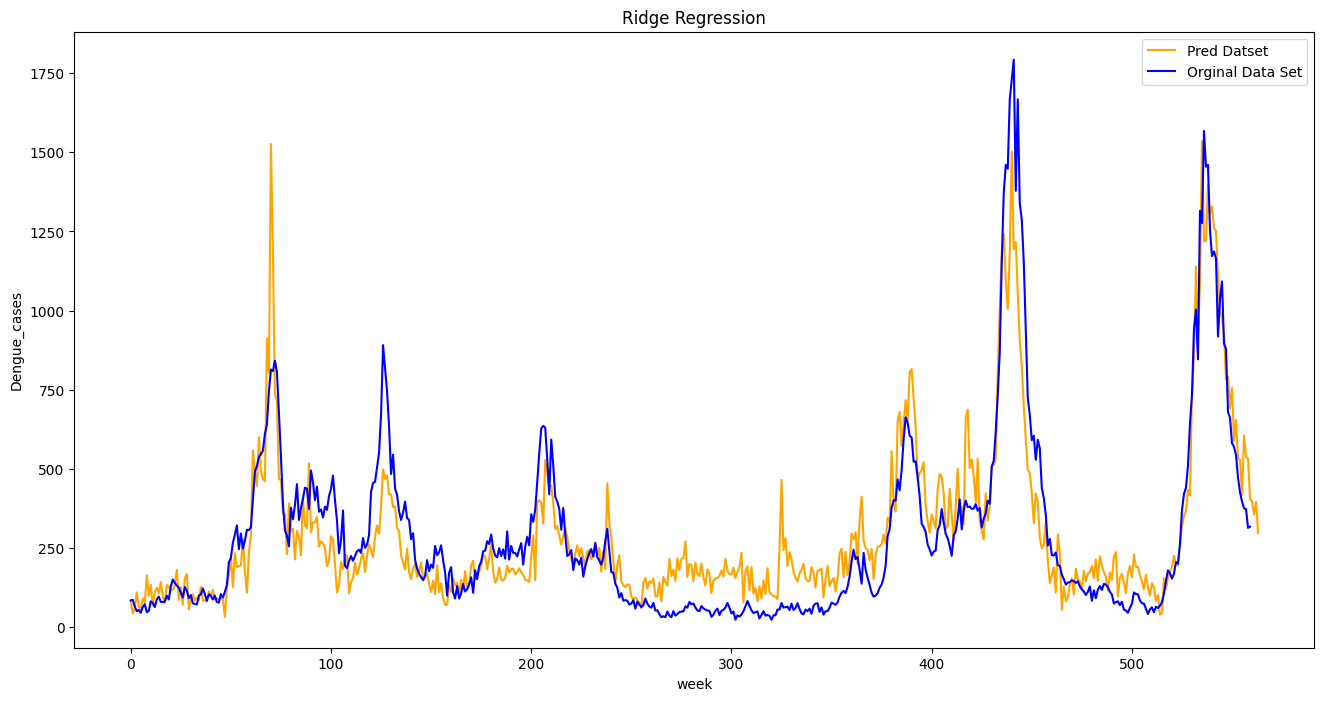

In [214]:
train = df.iloc[:511,]
test = df.iloc[511:,]

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_test= test[['mean_temperature','total_rainfall', 'interest']].values
#y_test= test['dengue_cases'].values.reshape(-1, 1)

# Step 3: Create and train the linear regression model
model = Ridge()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_ridge = model.predict(X[4:568])


# Step 5: Evaluate the model
mse = mean_squared_error(y[0:564], y_pred_ridge)
print(f'Mean Squared Error: {mse}')


actual_y_train= train['dengue_cases']
train_test_plot(y[0:560] ,y_pred_ridge)

coef=list(model.coef_)
print(coef)

plt.title('Ridge Regression')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

In [94]:
df.shape

(568, 11)

### ARIMA MODEL

Testing ARIMA model with (1,0,0)

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


model aic: 5584.803859362221
model rmse 479428.79720994324


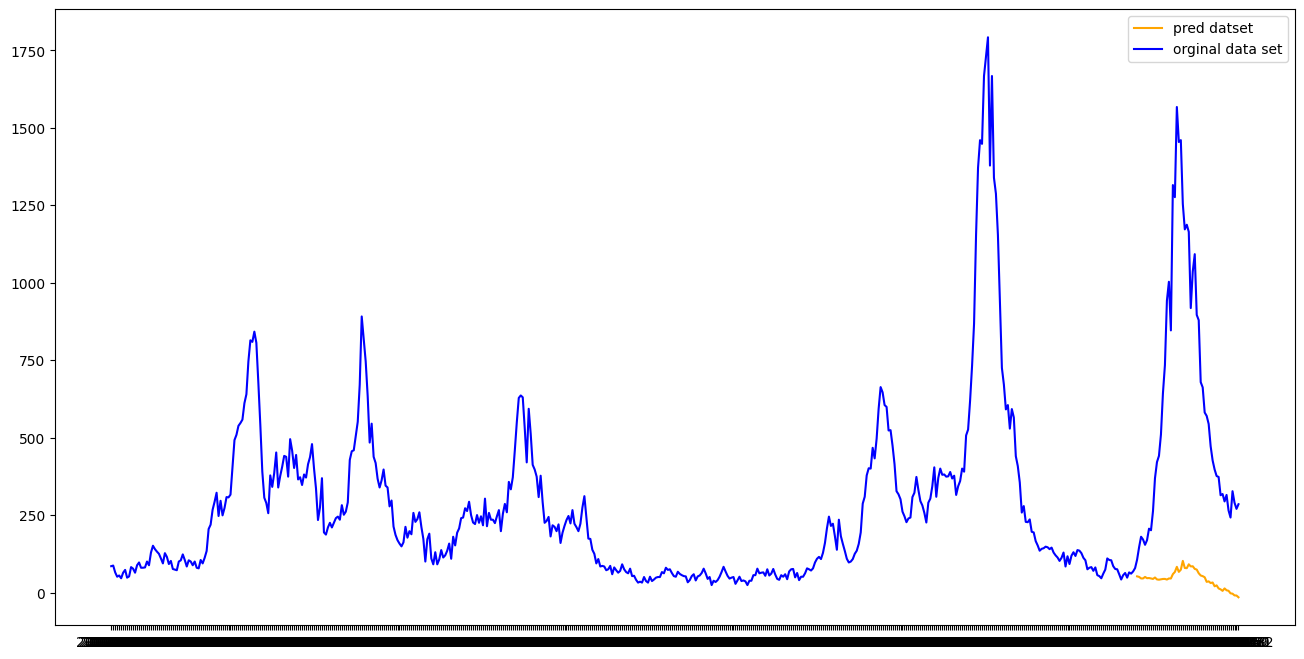

In [159]:
#train = Weekly_dengue.iloc[:511,]
#test = Weekly_dengue.iloc[511:,]

train_data = df.iloc[:511]
test_data = df.iloc[511:]

y = df['dengue_cases'].values.reshape(-1, 1)  # Input feature, reshaped to a 2D array
X = df[['mean_temperature','total_rainfall', 'interest']].values  # Target variable

# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(1, 0, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions100 = model_fit.predict(start=516, 
                                 end=567,
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])

#Print predictions
#print(predictions100)


#print MSE
mse100 = mean_squared_error(y[512:564], predictions100)
model_aic= model_fit.aic
print(f'model aic: {model_aic}')
print(f'model rmse {mse100}')
train_test_plot(Weekly_dengue,predictions100)

Testing ARIMA model with (2,0,0)

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834

model aic: 5586.352366958157
model rmse 485793.8044339157


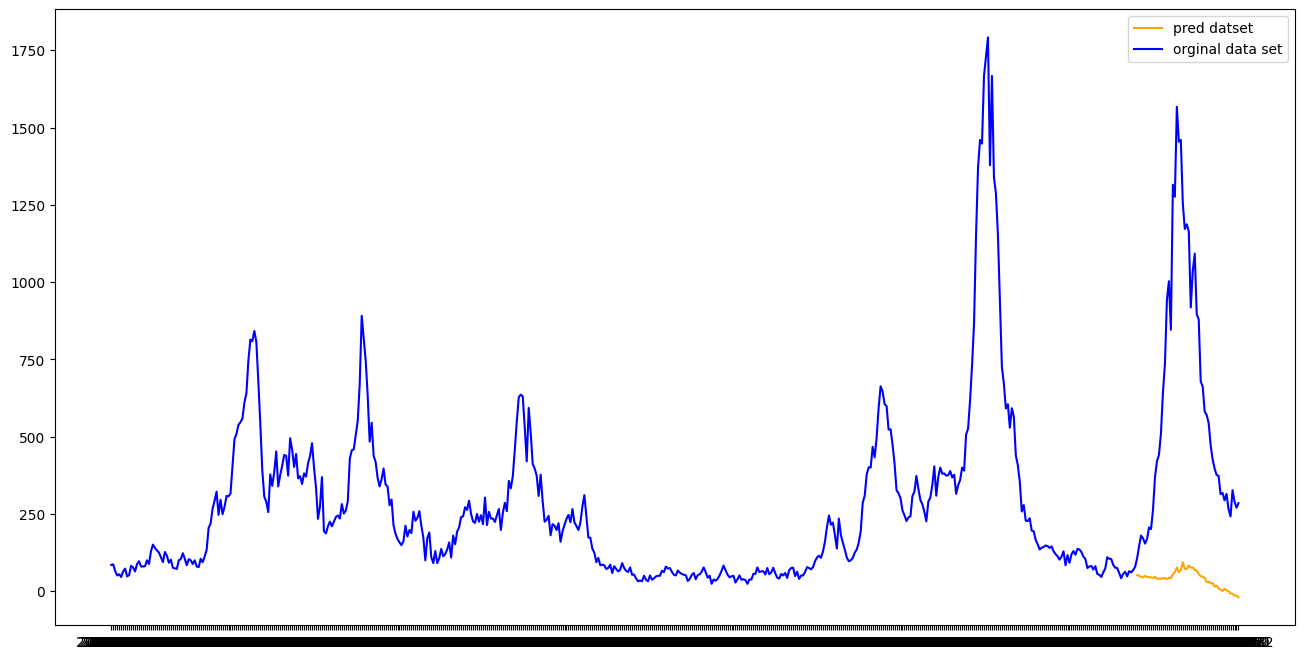

In [152]:
# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'],
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(2, 0, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions200 = model_fit.predict(start=516, 
                                 end=567, 
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])

# Print predictions
#print(predictions202)

#print MSE
mse200 = mean_squared_error(y[512:564], predictions200)
model_aic= model_fit.aic
print(f'model aic: {model_aic}')
print(f'model rmse {mse200}')
train_test_plot(Weekly_dengue,predictions200)

Testing ARIMA model with (2,1,0)

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


model aic: 5520.226588720378
model rmse 418815.87880444893


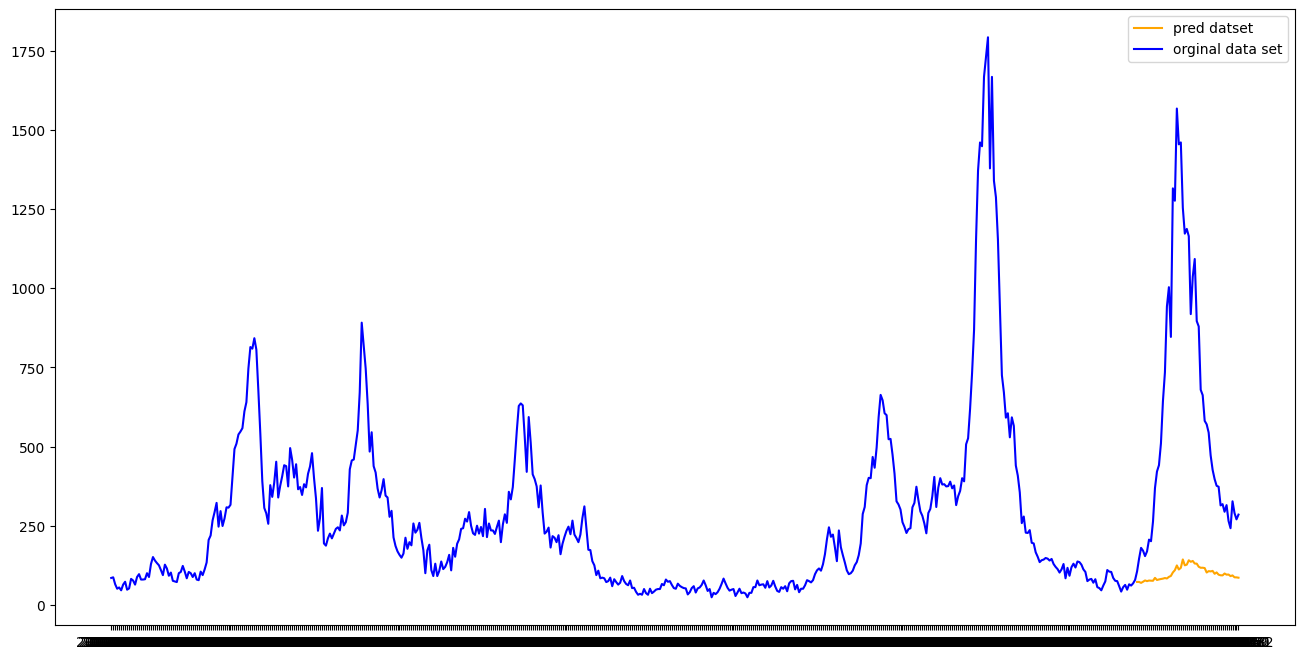

In [155]:
# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'], 
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(2, 1, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions210 = model_fit.predict(start=516, 
                                 end=567, 
                                 exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])

# Print predictions
#print(predictions210)

#print MSE
mse210 = mean_squared_error(y[512:564], predictions210)
model_aic= model_fit.aic
print(f'model aic: {model_aic}')
print(f'model rmse {mse210}')
train_test_plot(Weekly_dengue,predictions210)

### Gird search for ARIMA model Parameters. By best rmse

In [161]:
# Define ARIMA model parameters to search
p = [0,1, 2, 3]
d = [0, 1, 2]
q = [0, 1, 2]
params = list(product(p, d, q))

train_data = df.iloc[:511]
test_data = df.iloc[511:]

# Grid search to find optimal ARIMA model parameters
best_rmse = float('inf')
best_order = None
for param in params:
    try:
        model = ARIMA(endog=train_data['dengue_cases'], 
                      exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
                      order=param)  # ARIMA order: (p, d, q)
        model_fit = model.fit()
        predictions = model_fit.predict(start=511, 
                                        end=567, 
                                        exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])
        mse = mean_squared_error(test_data['dengue_cases'], predictions)
        rmse = np.sqrt(mse)
        if rmse < best_rmse:
            best_rmse = rmse
            best_order = param
        print(f' best rmse {rmse}')
    except:
        continue

# Fit ARIMA model with best parameters
best_model = ARIMA(endog=train_data['dengue_cases'], 
                   exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
                   order=best_order)
best_model_fit = best_model.fit()

# Make predictions with best model
predictions = best_model_fit.predict(start=511, 
                                      end=567, 
                                      exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])

# Print best model parameters and predictions
print("Best ARIMA Order: ", best_order)
print("Predictions: ", predictions)

mse = mean_squared_error(test_data['dengue_cases'], predictions)
print(f'model mse: {mse}')

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_

 best rmse 268.4208602159001
 best rmse 262.9456297694772


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_

 best rmse 310.23797978136696
 best rmse 624.5316724125407


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_

 best rmse 626.1714816205133
 best rmse 619.8141183336627


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_

 best rmse 507.72024907542965
 best rmse 668.5079381122086


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 642.0560970000676


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 664.3201160769493


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 663.1194058530309


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 665.3112008516682
 best rmse 627.2186854147204


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 642.0725259681188


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 634.9084153226793


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 473.8042257872048


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 632.3911599495113


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 636.8243725027311


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 668.373236634673


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 688.418488399342


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 695.1818584828825


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 623.2709061478564


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 629.7818288999387


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 632.3990278364522


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 542.335290351505


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 624.4438529346426


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 632.9529429743127


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 698.3306953770824


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 661.6400597019825


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 592.2017163980214


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 630.0193486321001


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 630.8698303394391


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/stats

 best rmse 628.271328294834


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 best rmse 584.059817388503


/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/statespac

 best rmse 631.441615165586
 best rmse 624.3901158909578
Best ARIMA Order:  (0, 0, 1)
Predictions:  511     129.372470
512     144.243833
513     116.529913
514     141.018001
515     154.820045
516     119.370567
517     116.760415
518      85.410791
519      66.848013
520     177.222223
521     153.501467
522     178.391937
523     196.343773
524     201.924407
525     215.083846
526     208.226374
527     201.077426
528     255.603970
529     311.276213
530     325.857893
531     336.476278
532     391.349568
533     385.215418
534     610.787856
535     726.066087
536     959.704977
537     787.924568
538     924.474933
539    1284.731214
540    1024.317616
541    1018.447301
542    1160.170855
543    1104.059153
544    1114.594861
545    1068.922336
546    1056.521067
547     943.769079
548     848.563236
549     831.857696
550     797.924721
551     678.030120
552     686.627030
553     598.002441
554     662.074227
555     528.134494
556     575.624792
557     470.144807
558    

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_

Fit best RMSE grid search ARIMA model

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


model aic: 6341.156239199223
 rmse:129.88835124089638
 mse: 16870.983788078473


Text(0, 0.5, 'Dengue_cases')

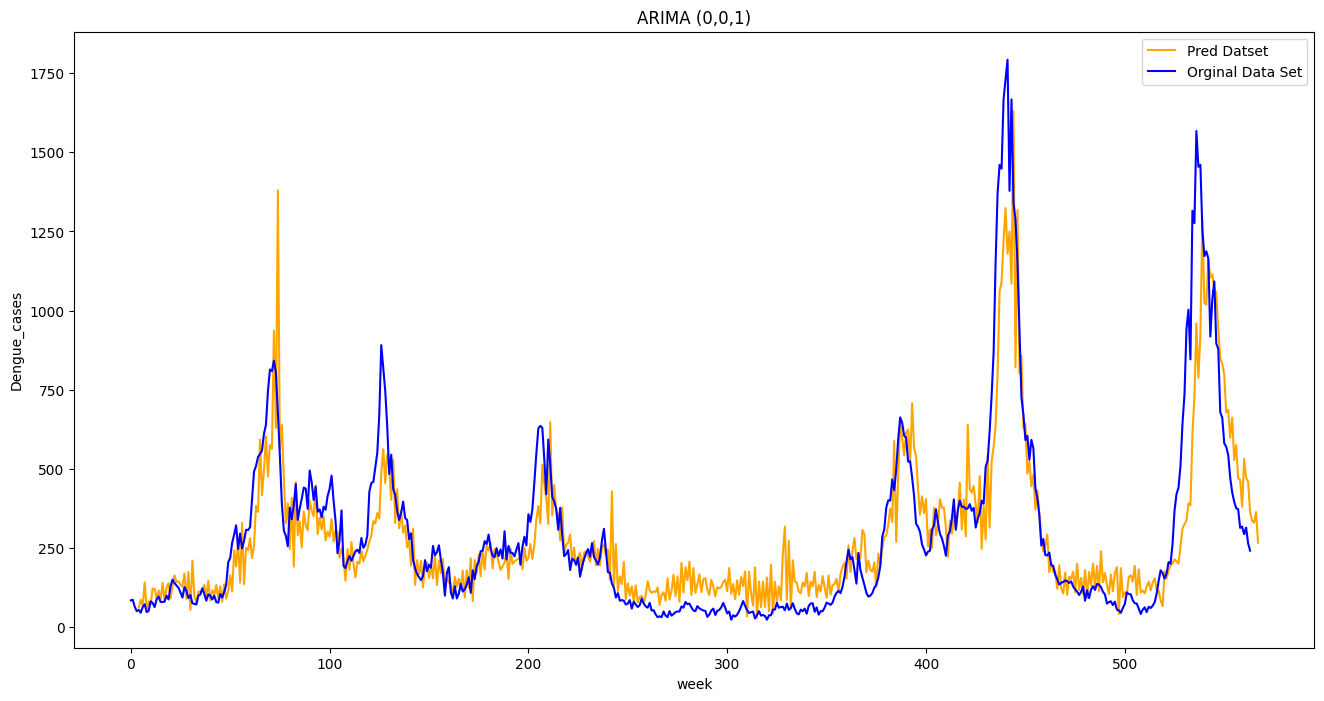

In [206]:
# Define ARIMA model best rmse parameter(3,2,0)
model = ARIMA(endog=train_data['dengue_cases'], 
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(0, 0, 1))

# Fit ARIMA model
model_fit = model.fit()
predictions320 = model_fit.predict(start=4,
                                   end=567, 
                                   exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])

# Print predictions
#print(predictions120)
model_aic= model_fit.aic
print(f'model aic: {model_aic}')
mse320 = mean_squared_error(y[0:564], predictions320)
rmse=np.sqrt(mse320)
print(f' rmse:{rmse}')
print(f' mse: {mse320}')

train_test_plot(y[0:564],predictions320)
plt.title(f'ARIMA (0,0,1)')
plt.xlabel('week')
plt.ylabel('Dengue_cases')

### Gird search for ARIMA model Parameters. by best AIC

In [ ]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_d = 0
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        for d in range(5):
                    try:
            
                        # Fitting an ARIMA(p, d, q) model.
                        print(f'Attempting ARIMA({p}, {d}, {q})')

                        # Instantiate ARIMA model.
                        arima = ARIMA(endog=train_data['dengue_cases'], 
                                      exog=train_data[['mean_temperature', 'total_rainfall', 'searches']], 
                                      order=(p, d, q))


                        # Fit ARIMA model.
                        model = arima.fit()#disp=False)

                        # Print out AIC for ARIMA(p, d, q) model.
                        print(f'The AIC for ARIMA({p},{d},{q}) is: {model.aic}')

                        # Is my current model's AIC better than our best_aic?
                        if model.aic < best_aic:

                            # If so, let's overwrite best_aic, best_p, and best_q.
                            best_aic = model.aic
                            best_p = p
                            best_q = q
                            best_d = d


                    except:
                        pass
            

#print()
#print()
print('MODEL FINISHED!')

print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting ARIMA(0, 0, 0)
Attempting ARIMA(0, 1, 0)
Attempting ARIMA(0, 2, 0)
Attempting ARIMA(0, 3, 0)
Attempting ARIMA(0, 4, 0)
Attempting ARIMA(0, 0, 1)
Attempting ARIMA(0, 1, 1)
Attempting ARIMA(0, 2, 1)
Attempting ARIMA(0, 3, 1)
Attempting ARIMA(0, 4, 1)
Attempting ARIMA(0, 0, 2)
Attempting ARIMA(0, 1, 2)
Attempting ARIMA(0, 2, 2)
Attempting ARIMA(0, 3, 2)
Attempting ARIMA(0, 4, 2)
Attempting ARIMA(0, 0, 3)
Attempting ARIMA(0, 1, 3)
Attempting ARIMA(0, 2, 3)
Attempting ARIMA(0, 3, 3)
Attempting ARIMA(0, 4, 3)
Attempting ARIMA(0, 0, 4)
Attempting ARIMA(0, 1, 4)
Attempting ARIMA(0, 2, 4)
Attempting ARIMA(0, 3, 4)
Attempting ARIMA(0, 4, 4)
Attempting ARIMA(1, 0, 0)
Attempting ARIMA(1, 1, 0)
Attempting ARIMA(1, 2, 0)
Attempting ARIMA(1, 3, 0)
Attempting ARIMA(1, 4, 0)
Attempting ARIMA(1, 0, 1)
Attempting ARIMA(1, 1, 1)
Attempting ARIMA(1, 2, 1)
Attempting ARIMA(1, 3, 1)
Attempting ARIMA(1, 4, 1)
Attempting ARIMA(1, 0, 2)
Attempting ARIMA(1, 1, 2)
Attempting ARIMA(1, 2, 2)
Attempting A

Fit best AIC grid search ARIMA model

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 best mse 419604.87568290223
model aic: 5565.771726965293


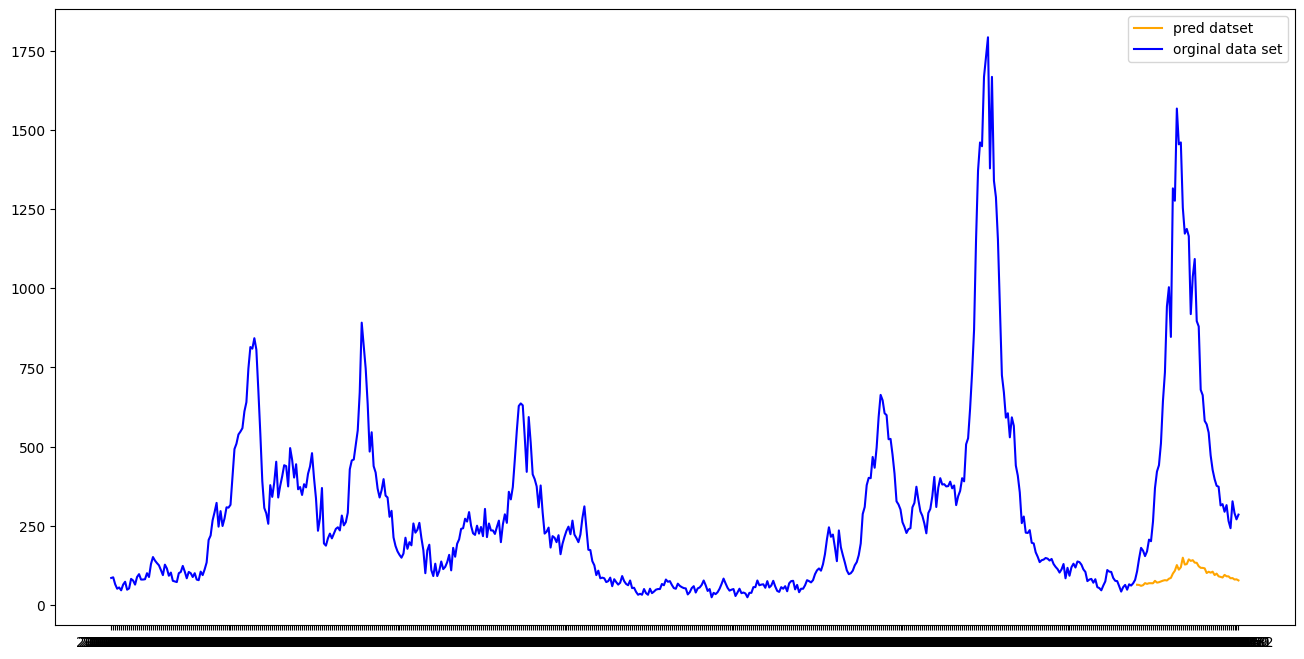

In [179]:
# Define ARIMA model
model = ARIMA(endog=train_data['dengue_cases'], 
              exog=train_data[['mean_temperature', 'total_rainfall', 'interest']], 
              order=(0, 1, 0))  # ARIMA order: (p, d, q)

# Fit ARIMA model
model_fit = model.fit()
predictions010 = model_fit.predict(start=516,
                                   end=567, 
                                   exog=test_data[['mean_temperature', 'total_rainfall', 'interest']])

# Print predictions
#print(predictions010)
mse = mean_squared_error(y[512:564], predictions010)
print(f' best mse {mse}')
model_aic= model_fit.aic
print(f'model aic: {model_aic}')
train_test_plot(Weekly_dengue,predictions010)

### Check for seasonal 

In [ ]:
plot_pacf(df['dengue_cases'],lags=50);

In [ ]:
plot_acf(df['dengue_cases'],lags=100);

no seasonality is found

### Fit SARIMA Model

/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dsi-sg-dl/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


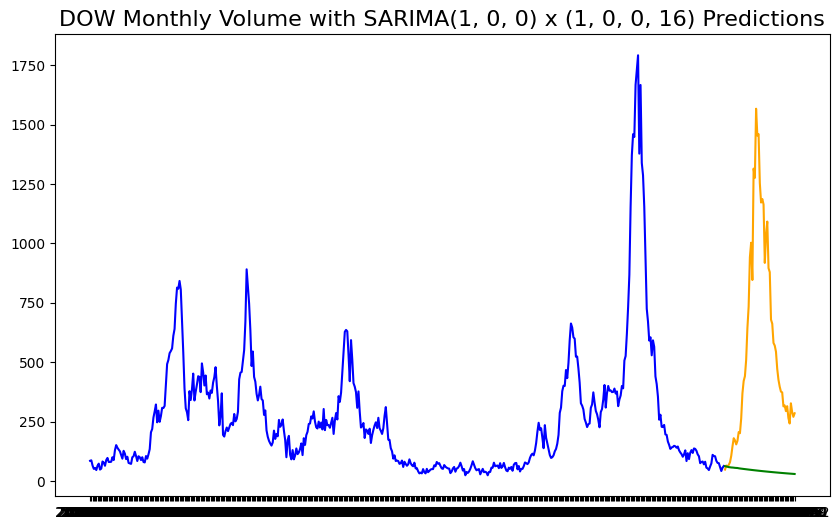

In [180]:
# Fit a SARIMA(1, 0, 0) x (1, 0, 0, 13) model.

sarima = SARIMAX(endog = train['dengue_cases'],
                 order = (1, 0, 0),              # (p, d, q)
                 seasonal_order = (1, 0, 0, 13)) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit(disp=False)

# Generate predictions based on test set.
preds = model.predict(start=len(train_data), 
                              end=len(train_data) + len(test_data) - 1,)

# Evaluate predictions.
#print(mean_squared_error(test['dengue_cases'], preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train['dengue_cases'], color = 'blue')
plt.plot(test['dengue_cases'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'DOW Monthly Volume with SARIMA(1, 0, 0) x (1, 0, 0, 16) Predictions', fontsize=16)
plt.show();

Try search for best parameter for SARIMAX

In [181]:
def sarimax(ts,exo,all_param):
    results = []
    for param in all_param:
        try:
            mod = SARIMAX(ts,
                          exog = exo,
                          order=param[0],
                          seasonal_order=param[1])
            res = mod.fit()
            results.append((res,res.aic,param))
            print('Tried out SARIMAX{}x{} - AIC:{}'.format(param[0], param[1], round(res.aic,2)))
        except Exception as e:
            print(e)
            continue
            
    return results

# set parameter range
p,d,q = range(1,3),[1],range(1,3)
P,D,Q,s = range(0,3),[1],range(0,3),[30]
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))
all_param = list(itertools.product(pdq,seasonal_pdq))

all_res = sarimax(train,train_data[['mean_temperature', 'total_rainfall', 'interest']],all_param)

Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereUnnamed: 0              object
total_rainfall         float64
mean_temperature       float64
minimum_temperature    float64
maximum_temperature    float64
dengue_cases             int64
interest               float64
inbound                float64
outbound               float64
first_diff_dengue      float64
second_diff_dengue     float64
dtype: object and mean_temperature    float64
total_rainfall      float64
interest            float64
dtype: object. The data was
           Unnamed: 0  total_rainfall  mean_temperature  minimum_temperature  \
Unnamed: 0                                                                     
2012-W05     2012-W05           106.8         26.762500                 22.2   
2012-W06     2012-W06            25.8         26.228571                 22.1   
2012-W07     2012-W07            28.0         26.914286                 22.9   
2012-W08     2012-W08      

In [ ]:
# Fit a SARIMA(1, 0, 0) x (1, 0, 0, 13) model.

sarima = SARIMAX(endog = train['dengue_cases'],
                 order = (2, 1, 2),              # (p, d, q)
                 seasonal_order = (2, 1, 2, 7)) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit(disp=False)

# Generate predictions based on test set.
preds = model.predict(start=len(train_data), 
                              end=len(train_data) + len(test_data) - 1,)

# Evaluate predictions.
#print(mean_squared_error(test['dengue_cases'], preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train['dengue_cases'], color = 'blue')
plt.plot(test['dengue_cases'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'DOW Monthly Volume with SARIMA(2, 1, 2) x (2, 1, 2, 7) Predictions', fontsize=16)
plt.show();